<a href="https://colab.research.google.com/github/PeterStoreshaw/PeterStoreshaw.github.io/blob/master/Copy_of_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 2, What Animal? A deep learning model that can identify 10 different animal species.

To Begin with we will use the code from fast AI
'bird or not'

In [1]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

The following downloads duck duck go search and its upgraded version if needed.

In [2]:
# Skip this cell if you already have duckduckgo_search installed
!pip install -Uqq duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 715.7 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [3]:
!pip install --upgrade duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Install Fastbook

In [4]:
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

Set up the image search

In [5]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

Let's start by searching for a bird photo 

In [6]:
from fastbook import search_images_ddg 
urls = search_images_ddg('bird photos', max_images=1) 
urls[0]

'http://2.bp.blogspot.com/-TA1D79yxcnM/Tyy6ng42rbI/AAAAAAAAAnc/-4s-bZaYc_U/s1600/colorfull+bird+HD+wallpaper.jpg'

...and then download a URL and take a look at it:

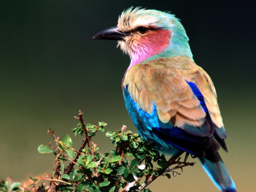

In [7]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "cat photos":
The cat photos should be pretty easy to identify, there are no other cat like animals and it is a specific species.

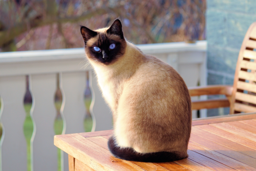

In [8]:
download_url(search_images_ddg('cat photos', max_images=1)[0], 'cat.jpg', show_progress=False) 
Image.open('cat.jpg').to_thumb(256,256) 


Now let's do the same with "gorilla photos":
The Gorillas should be another easy one, though several of the gorilla photos include humans so it will be intersesting to see if using humans as the test photo brings up gorilla.

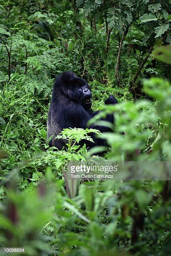

In [9]:
download_url(search_images_ddg('gorilla photos', max_images=1)[0], 'gorilla.jpg', show_progress=False) 
Image.open('gorilla.jpg').to_thumb(256,256) 

Now let's do the same with "insect photos":
This on is interesting, insect is a very broad catagory. As such the 200 photos - the ones culled, may not be enough to train the system. 
This will be a good test. 

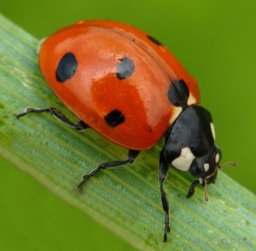

In [10]:
download_url(search_images_ddg('insect photos', max_images=1)[0], 'insect.jpg', show_progress=False) 
Image.open('insect.jpg').to_thumb(256,256) 

Now let's do the same with "fish photos":
The fish is a similar catagory to insects, a varied group. However due to the water, it may be that the system has an easier time traning. 

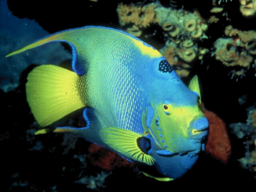

In [11]:
download_url(search_images_ddg('fish photos', max_images=1)[0], 'fish.jpg', show_progress=False) 
Image.open('fish.jpg').to_thumb(256,256) 

Now let's do the same with "kangaroo photos":
This is a very specific species and as such will help verify if the system can do the basics.

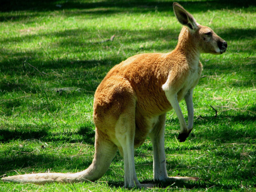

In [12]:
download_url(search_images_ddg('kangaroo photos', max_images=1)[0], 'kangaroo.jpg', show_progress=False) 
Image.open('kangaroo.jpg').to_thumb(256,256) 

Now let's do the same with "koala photos":
Similar to kangaroo, Will help verify

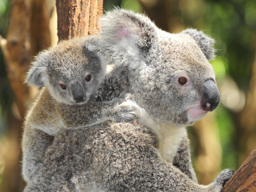

In [13]:
download_url(search_images_ddg('koala photos', max_images=1)[0], 'koala.jpg', show_progress=False) 
Image.open('koala.jpg').to_thumb(256,256) 

Now let's do the same with "elephant photos":
Same as previous should be easy to identify.

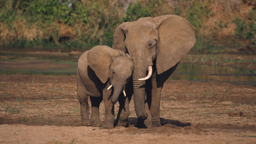

In [14]:
download_url(search_images_ddg('elephant photos', max_images=1)[0], 'elephant.jpg', show_progress=False) 
Image.open('elephant.jpg').to_thumb(256,256) 

Now let's do the same with "lizards photos":
Now we get back to tricky, this is a broad group, that has similarities to the frogs. So it along with frogs, fish and insects will determine how rigorous the program is.

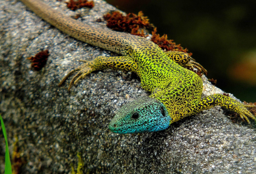

In [15]:
download_url(search_images_ddg('lizard photos', max_images=1)[0], 'lizard.jpg', show_progress=False) 
Image.open('lizard.jpg').to_thumb(256,256) 

Now let's do the same with "frog photos":
Similar to lizards, though a more specific group. Issue may be that there are lots of cartoons in the traning folder.

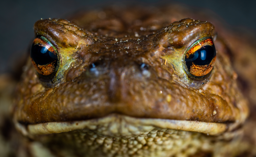

In [16]:
download_url(search_images_ddg('frog photos', max_images=1)[0], 'frog.jpg', show_progress=False) 
Image.open('frog.jpg').to_thumb(256,256) 

Our searches seem to be giving reasonable results, so let's grab 200 examples of each and save each group of photos to a different folder:

If using google colab we can just grab those photos already downloaded.
If runing for the first time skip this step 

In [17]:
from google.colab import drive

drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/Q2.zip'

path = Path('Q2') 

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Q2.zip
   creating: Q2/
   creating: Q2/bird/
  inflating: Q2/bird/003937f7-1033-4508-9868-0f8b9305c27b.jpg  
  inflating: Q2/bird/00fd0483-aebe-471d-b77e-856ea62827fe.jpg  
  inflating: Q2/bird/01b95e84-a542-46ff-a65f-b78a4aa90281.png  
  inflating: Q2/bird/0313bdf2-a852-4311-8863-40c8766fa306.jpg  
  inflating: Q2/bird/032f5cea-f0a2-4cde-8c79-998c203279fd.jpg  
  inflating: Q2/bird/0464319e-b44c-44b8-bd1f-a5e247611588.jpg  
  inflating: Q2/bird/04b6a1c8-e2db-4713-b9d1-610be05f636e.jpg  
  inflating: Q2/bird/05098132-4e6a-480b-9aa1-4cdc9bfad8ea.jpg  
  inflating: Q2/bird/05697eb6-f183-4400-bc0c-07b97ae5cf96.jpg  
  inflating: Q2/bird/05de98a4-0927-45b4-9b24-718f264ed8f6.jpg  
  inflating: Q2/bird/06f38289-76e2-47e3-a0a5-929cd0dfa22d.jpg  
  inflating: Q2/bird/074da816-ea05-479f-a9db-5eeceb325df6.jpg  
  inflating: Q2/bird/0827188c-0640-48f2-895b-cb601da65eef.jpg  
  inflating: Q2/bird/0882db56-eeff-42ac-837d-e961c71da304.jpg  

If the previous step was run and successful SKIP THIS STEP.

In [ ]:
searches = 'cat', 'gorilla', 'insect', 'fish', 'koala', 'kangaroo', 'lizard', 'frog', 'elephant', 'bird' 
path = Path('Q2') 
from time import sleep 

for o in searches: 
    dest = (path/o) 
    dest.mkdir(exist_ok=True, parents=True) 
    download_images(dest, urls=search_images_ddg(f'{o} photo')) 
    sleep(10)  # Pause between searches to avoid over-loading server 
    download_images(dest, urls=search_images_ddg(f'{o} sun photo')) 
    sleep(10) 
    download_images(dest, urls=search_images_ddg(f'{o} shade photo')) 
    sleep(10) 
    resize_images(path/o, max_size=400, dest=path/o) 


## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

After this step I went into the folders and manualy deleted all of the phots that do not fit. There were so so many lamps. The process is detailed in my blog.

In [18]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

Create the data block.

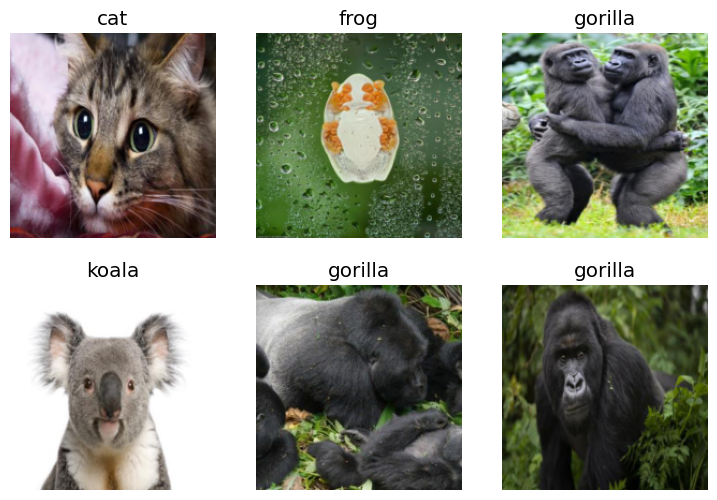

In [19]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

If running in colab, once all photos downloaded. Run this box, otherwise skip.

In [ ]:
from google.colab import drive

# mount will create a folder at the left folder section on the page, but it will take a minute or so to see it

drive.mount('/content/drive') 

!zip -r Q2.zip Q2

!cp Q2.zip /content/drive/My\ Drive/ 

Run the learner

In [30]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.768238,0.437956,0.112060,00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.290243,0.387712,0.094984,00:35
1,0.208692,0.452187,0.096051,00:34
2,0.127561,0.420078,0.083244,00:36
3,0.069991,0.391244,0.081110,00:35
4,0.035571,0.385847,0.075774,00:34


## Step 3: Check Accuracy

Create and plot a confusion matrix


The confusion matrix will help identify the accuracy. 
It works by finding the true negative, true positive, false negative and false positive for each selection. 
So, if we predicted cat, and it was a cat that is a true positive. 
The matrix this code will create just looks at true positives and incorrect choices. If the majority of diagonal line from left to right is all 100 percent we know that the system is perfectly accurate. 


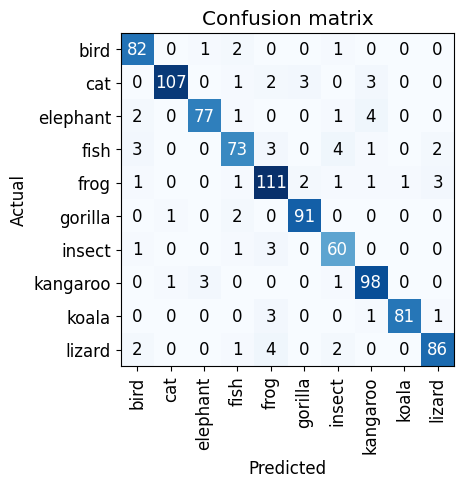

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Show the worst 8 photos for confusion.
 This shows us the 8 most troublesome photos that the sytem is stugling to correctly identify.

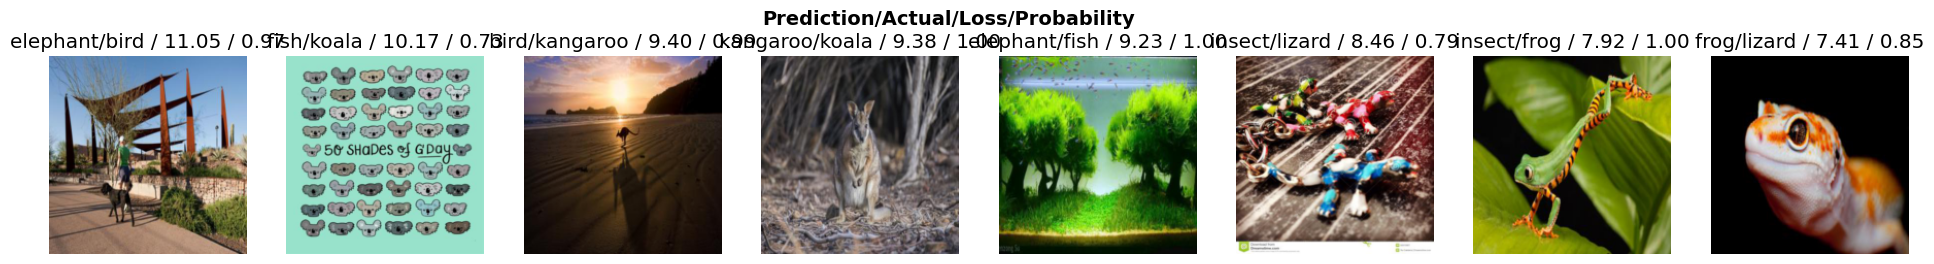

In [27]:
interp.plot_top_losses(8, nrows=1)


## Step 4: Prediction

In [40]:
guess,_,probs = learn.predict(PILImage.create('frog.jpg'))
print(f"This is a: {guess}.")


This is a: frog.
